In [97]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [74]:
data=pd.read_csv('/content/heart_disease_data.csv')

In [75]:

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
data.describe(

)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [79]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [80]:
data.shape

(303, 14)

In [81]:
data['target'].value_counts()

,count
target,
1,165
0,138


In [82]:
x=data.drop(columns='target',axis=1)
y=data['target']

In [83]:
print (y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [84]:
print (y.sum)

<bound method Series.sum of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>


In [85]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4, stratify=y,random_state=2)

In [86]:
print (x.shape , x_train.shape , x_test.shape)

(303, 13) (181, 13) (122, 13)


In [109]:
model=LogisticRegression()

In [88]:
model.fit(x_train , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
from sklearn.metrics import accuracy_score

# ------- Train Accuracy -------
x_train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(y_train, x_train_prediction)
print("Train Data Set Accuracy:", train_accuracy * 100, "%")

# ------- Test Accuracy -------
x_test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(y_test, x_test_prediction)
print("Test Data Set Accuracy:", test_accuracy * 100, "%")


Train Data Set Accuracy: 87.29281767955801 %
Test Data Set Accuracy: 83.60655737704919 %


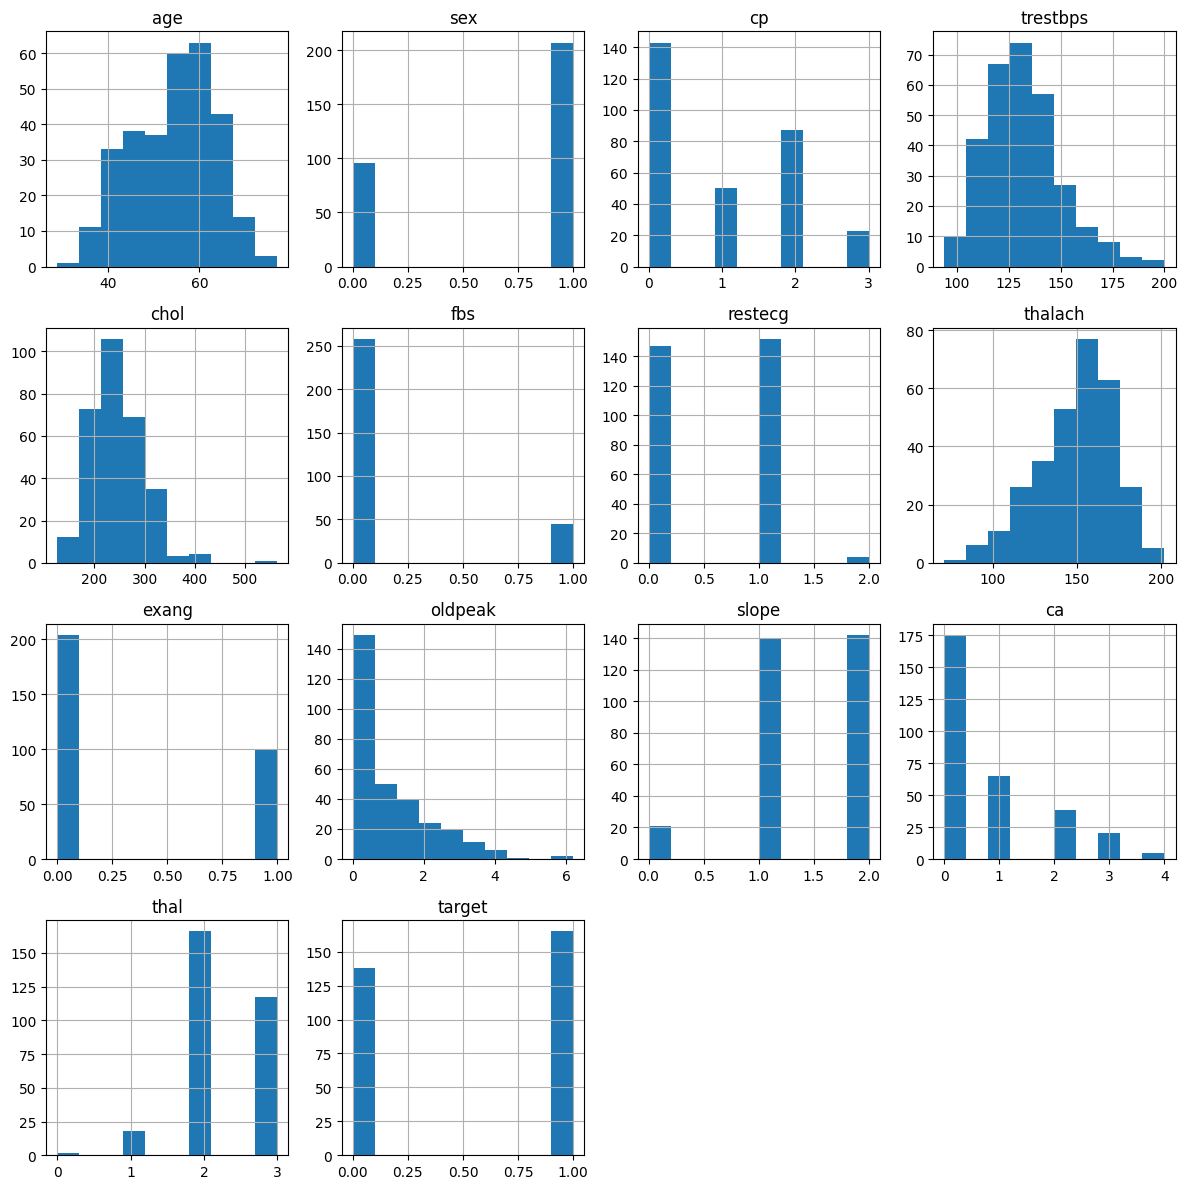

In [91]:
# 1) HISTOGRAMS
# ========================
data.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()


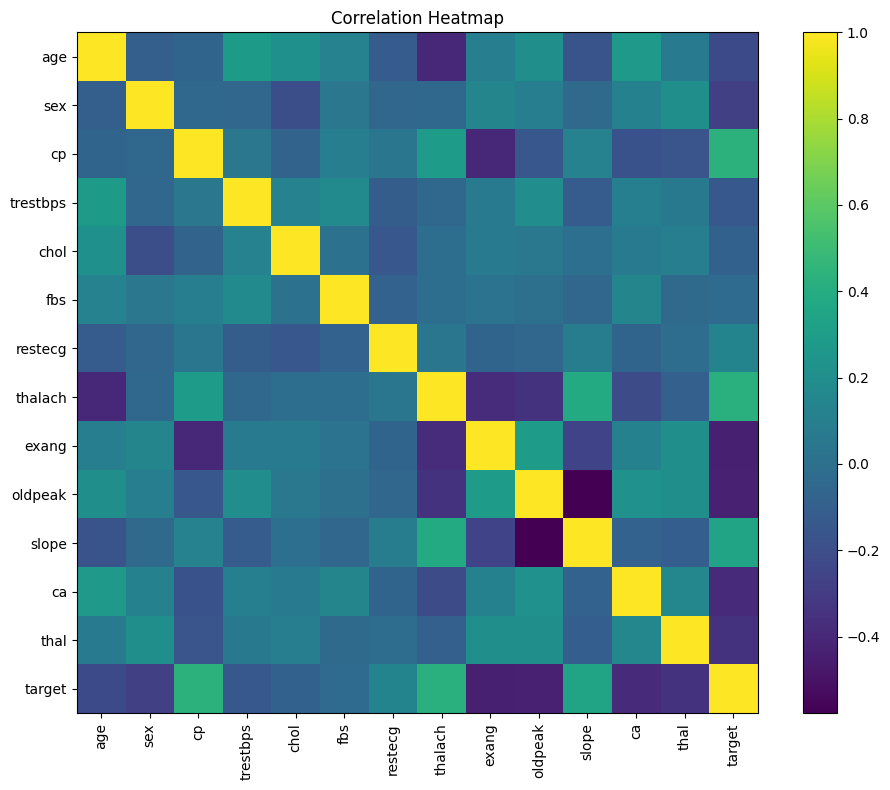

In [92]:
# 2) CORRELATION HEATMAP
# ========================
corr = data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


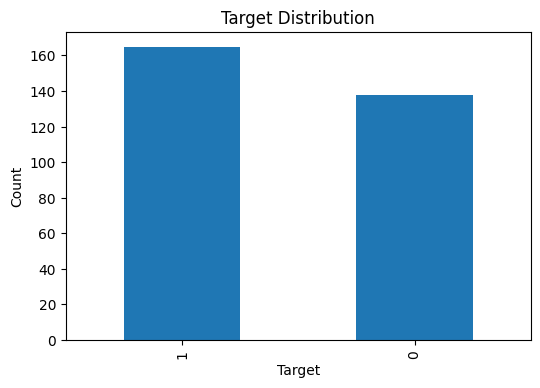

In [93]:
# 3) TARGET DISTRIBUTION
# ========================
plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

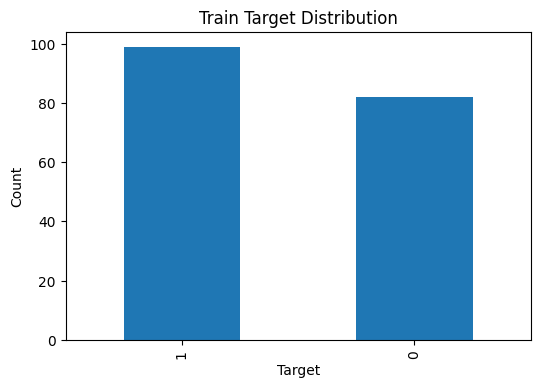

In [94]:
 #Train target distribution
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind='bar')
plt.title("Train Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


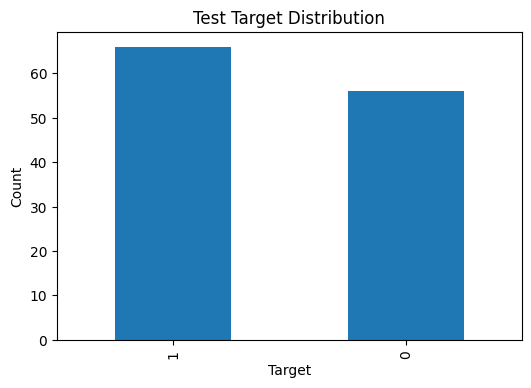

In [95]:
# Test target distribution
plt.figure(figsize=(6,4))
y_test.value_counts().plot(kind='bar')
plt.title("Test Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

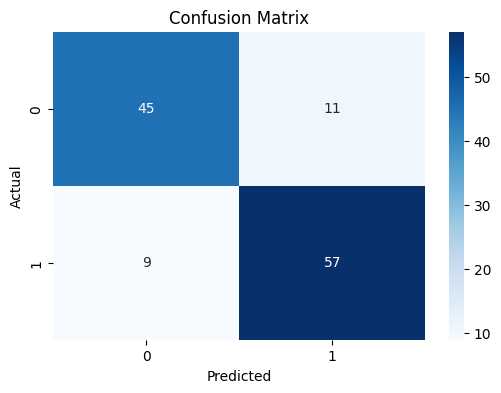

In [102]:

# --------- Confusion Matrix ---------
cm = confusion_matrix(y_test,x_test_prediction)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [106]:
y_pred = model.predict(x_test)

accuracy  = accuracy_score(y_test, x_test_prediction)
precision = precision_score(y_test, x_test_prediction, average='binary')
recall    = recall_score(y_test,x_test_prediction, average='binary')
f1        = f1_score(y_test,x_test_prediction, average='binary')

print("Accuracy :", (accuracy)*100,"%")
print("Precision:", (precision)*100,"%")
print("Recall   :", (recall)*100,"%")
print("F1 Score :", (f1)*100,"%")

Accuracy : 83.60655737704919 %
Precision: 83.82352941176471 %
Recall   : 86.36363636363636 %
F1 Score : 85.07462686567165 %


BUILD A PREDET SYSTEM


In [126]:
input_data= (42,1,2,120,240,1,1,194,0,0.8,0,0,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [127]:
model.fit(x_train, y_train)
pred = model.predict(input_data_reshaped)
print(pred)
if(pred[0]==0):
  print('The person does not have a heart disease')
else:
  print(' يا وجع القلب ')

[1]
يا وجع القلب 


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
